# Лабараторная №1. Основый предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [3]:
path='credit_3530203_70101.csv'
credit_df = pd.read_csv(path, index_col=0)

In [3]:
credit_df
#credit_df.info()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,foreign_worker,class
1,0<=X<200,18.0,existing paid,radio/tv,1301.0,<100,>=7,4.0,guarantor,real estate,32.0,none,own,1.0,unskilled resident,1.0,yes,good
2,>=200,6.0,critical/other existing credit,new car,1323.0,100<=X<500,>=7,2.0,none,car,28.0,none,own,2.0,skilled,2.0,yes,good
3,<0,24.0,existing paid,new car,3123.0,<100,<1,4.0,none,life insurance,27.0,none,own,1.0,skilled,1.0,yes,bad
4,<0,36.0,existing paid,used car,5493.0,<100,>=7,2.0,none,no known property,42.0,none,for free,1.0,skilled,2.0,yes,good
5,>=200,9.0,existing paid,radio/tv,1126.0,100<=X<500,>=7,2.0,none,real estate,49.0,none,own,1.0,skilled,1.0,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,none,real estate,31.0,none,own,1.0,unskilled resident,1.0,yes,good
499,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,none,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,good
500,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,none,car,38.0,none,own,1.0,skilled,1.0,yes,good
501,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,none,no known property,23.0,none,for free,1.0,skilled,1.0,yes,bad


Посмотрим на область значений каждого столбца. Области больше чем из десяти элементов обрежем.

In [4]:
for col in credit_df.columns:
    print(col, credit_df[col].unique()[:10])

checking_status ['0<=X<200' '>=200' '<0' 'no checking']
duration [18.  6. 24. 36.  9. 10. 15. 39. 12. -1.]
credit_history ['existing paid' 'critical/other existing credit' 'all paid'
 'delayed previously' 'no credits/all paid']
purpose ['radio/tv' 'new car' 'used car' 'business' 'furniture/equipment'
 'repairs' 'education' 'retraining' 'domestic appliance' 'other']
credit_amount [1301. 1323. 3123. 5493. 1126. 1216. 1207. 1309. 2360. 6850.]
savings_status ['<100' '100<=X<500' 'no known savings' '500<=X<1000' '>=1000']
employment ['>=7' '<1' '1<=X<4' 'unemployed' '4<=X<7' '0']
installment_commitment [4. 2. 1. 3.]
other_parties ['guarantor' 'none' 'co applicant']
property_magnitude ['real estate' 'car' 'life insurance' 'no known property']
age [32. 28. 27. 42. 49. 38. 24. 36. 34. 45.]
other_payment_plans ['none' 'bank' 'stores']
housing ['own' 'for free' 'rent']
existing_credits [1. 2. 4. 3.]
job ['unskilled resident' 'skilled' 'high qualif/self emp/mgmt'
 'unemp/unskilled non res']
num_d

Отсюда делаем выводы:

    checking_status - порядковая
    duration - абсолютная
    credit_history - номинальная
    purpose - номинальная
    credit_amount - абсолютная
    savings_status - порядковая
    employment - порядковая
    installment_commitment - порядковая
    other_parties - номинальная
    property_magnitude - номинальная
    age - абсолютная
    other_payment_plans - номинальная
    housing - номинальная
    existing_credits - абсолютная
    job - номинальная
    num_dependents - абсолютная
    foreign_worker - номинальная
    class - номинальная

Найдем признак с наименьшей дисперсией.


In [5]:
credit_df.std()

duration                    12.748
credit_amount             2822.553
installment_commitment       1.106
age                         11.274
existing_credits             0.586
num_dependents               0.374
dtype: float64

In [24]:
groups = credit_df.groupby(by="class").mean()
groups

,duration,credit_amount,installment_commitment,age,existing_credits,num_dependents
class,,,,,,
bad,25.023,3682.220,3.067,33.317,1.354,1.152
good,20.005,3109.109,2.964,36.621,1.453,1.175


Среднее какого признака отличается для двух классов сильнее всего?

Для сравнения разных шкал используем нормировку на максимальное значение

In [28]:
groups = credit_df.groupby(by="class").mean()
group_max = groups.max()

1 - groups / group_max

,duration,credit_amount,installment_commitment,age,existing_credits,num_dependents
class,,,,,,
bad,0.000,0.000,0.000,0.09,0.068,0.019
good,0.201,0.156,0.033,0.00,0.000,0.000


Найдем класс, в котором больше всего "skilled" работников.

In [7]:
credit_df.loc[credit_df["job"] == "skilled"].groupby(by="class").size()

class
bad     107
good    213
dtype: int64

Найдём признаки с выбросами.

<AxesSubplot:>

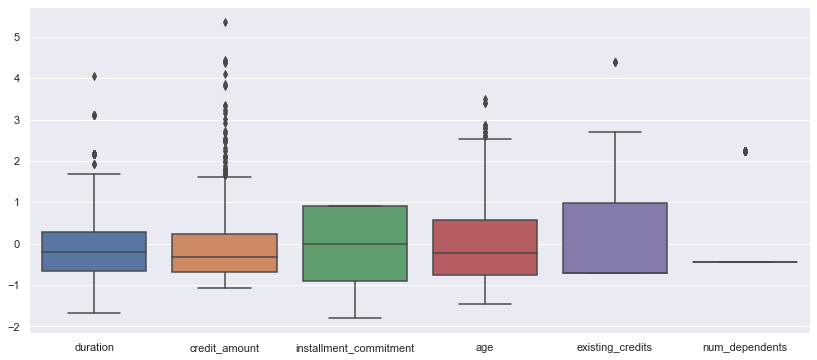

In [8]:
credit_df_numeric = credit_df.select_dtypes(include=np.number)
normalized_credit_df = (credit_df_numeric - credit_df_numeric.mean()) / credit_df_numeric.std()

plt.subplots(figsize=(14,6))
sns.boxplot(data=normalized_credit_df)

Найдем, сколько в наборе пропущенных значений.

Непосредственно пропущенных значений нет:

In [9]:
credit_df.isnull().sum() 

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
other_parties             0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
foreign_worker            0
class                     0
dtype: int64

Используем функцию describe, видим, что есть кандидат на пропущенное значение -- -1 в duration

In [10]:
credit_df.describe()

,duration,credit_amount,installment_commitment,age,existing_credits,num_dependents
count,502.000,502.000,502.000,502.000,502.000,502.000
mean,20.426,3296.341,2.998,35.542,1.420,1.167
std,12.748,2822.553,1.106,11.274,0.586,0.374
min,-1.000,250.000,1.000,19.000,1.000,1.000
25%,12.000,1376.250,2.000,27.000,1.000,1.000
50%,18.000,2356.000,3.000,33.000,1.000,1.000
75%,24.000,3975.250,4.000,42.000,2.000,1.000
max,72.000,18424.000,4.000,75.000,4.000,2.000


Проанализируем область значений, видим что в столбце employment есть значение ноль.

Также наблюдаем значения 'no checking', 'no known property', 'none'
Однако, значения 'none' в столбцах other_payment_plans и other_parties скорее всего не пропущенные, а просто указывают, что у человека нет других планов платежей и на отсутствие поручителей или созаявителей соответственно.


In [11]:
for col in credit_df.columns:
    print(col, credit_df[col].unique()[:10])

checking_status ['0<=X<200' '>=200' '<0' 'no checking']
duration [18.  6. 24. 36.  9. 10. 15. 39. 12. -1.]
credit_history ['existing paid' 'critical/other existing credit' 'all paid'
 'delayed previously' 'no credits/all paid']
purpose ['radio/tv' 'new car' 'used car' 'business' 'furniture/equipment'
 'repairs' 'education' 'retraining' 'domestic appliance' 'other']
credit_amount [1301. 1323. 3123. 5493. 1126. 1216. 1207. 1309. 2360. 6850.]
savings_status ['<100' '100<=X<500' 'no known savings' '500<=X<1000' '>=1000']
employment ['>=7' '<1' '1<=X<4' 'unemployed' '4<=X<7' '0']
installment_commitment [4. 2. 1. 3.]
other_parties ['guarantor' 'none' 'co applicant']
property_magnitude ['real estate' 'car' 'life insurance' 'no known property']
age [32. 28. 27. 42. 49. 38. 24. 36. 34. 45.]
other_payment_plans ['none' 'bank' 'stores']
housing ['own' 'for free' 'rent']
existing_credits [1. 2. 4. 3.]
job ['unskilled resident' 'skilled' 'high qualif/self emp/mgmt'
 'unemp/unskilled non res']
num_d

Заменим пропущенные значения на NaN

In [12]:
credit_df.loc[:,'employment'] = credit_df['employment'].replace('0', np.NaN)
credit_df.loc[:,'duration'] = credit_df['duration'].replace(-1, np.NaN)

#credit_df.loc[:,'property_magnitude'] = credit_df['property_magnitude'].replace('no known property', np.NaN)

#credit_df.loc[:,'savings_status'] = credit_df['savings_status'].replace('no known savings', np.NaN)
#credit_df.loc[:,'checking_status'] = credit_df['checking_status'].replace('no checking', np.NaN)

#credit_df.loc[:,'other_payment_plans'] = credit_df['other_payment_plans'].replace('none', np.NaN)
#credit_df.loc[:,'other_parties'] = credit_df['other_parties'].replace('none', np.NaN)

Подсчитаем количество пропущенных значений и их долю от всех значений

In [13]:
credit_df.isna().sum()

checking_status            0
duration                  27
credit_history             0
purpose                    0
credit_amount              0
savings_status             0
employment                 8
installment_commitment     0
other_parties              0
property_magnitude         0
age                        0
other_payment_plans        0
housing                    0
existing_credits           0
job                        0
num_dependents             0
foreign_worker             0
class                      0
dtype: int64

In [14]:
credit_df.isnull().mean()

checking_status           0.000
duration                  0.054
credit_history            0.000
purpose                   0.000
credit_amount             0.000
savings_status            0.000
employment                0.016
installment_commitment    0.000
other_parties             0.000
property_magnitude        0.000
age                       0.000
other_payment_plans       0.000
housing                   0.000
existing_credits          0.000
job                       0.000
num_dependents            0.000
foreign_worker            0.000
class                     0.000
dtype: float64

Заполним пропущенные значения следующим образом:

In [15]:
credit_df['duration'].fillna(credit_df['duration'].mean(), inplace = True)
credit_df['employment'].fillna('unemployed', inplace = True)
credit_df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
other_parties             0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
foreign_worker            0
class                     0
dtype: int64

Построим информативные диаграммы для признаков


Визуализируем категориальные признаки.

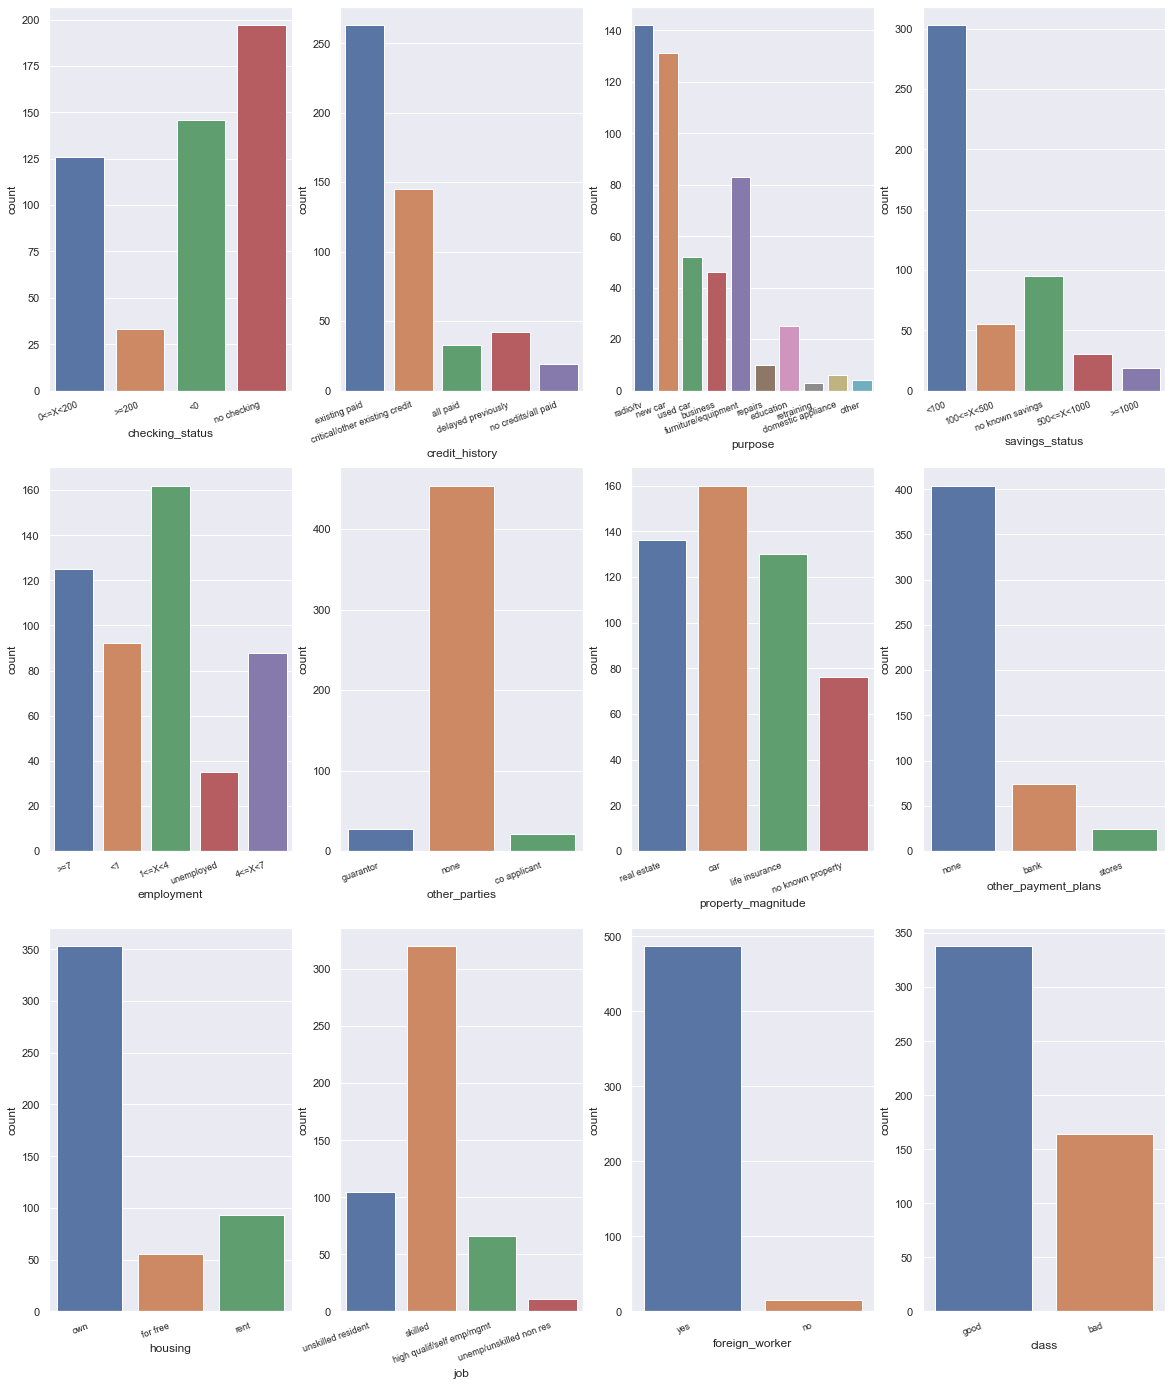

In [16]:
categorical_cols = [
    "checking_status",
    "credit_history",
    "purpose",
    "savings_status",
    "employment",
    "other_parties",
    "property_magnitude",
    "other_payment_plans",
    "housing",
    "job",
    "foreign_worker",
    "class",
]

fig_rows = 3
fig_cols = len(categorical_cols) // fig_rows
    
fig, ax = plt.subplots(fig_rows, fig_cols, figsize=(20, 24))
for i in range(fig_rows):
    for j in range(fig_cols):
        cur_ax = sns.countplot(x=categorical_cols[fig_cols * i + j], data=credit_df, ax=ax[i][j])
        cur_ax.set_xticklabels(cur_ax.get_xticklabels(), fontsize=9, rotation=20, ha="right")

Построим также круговые диаграммы

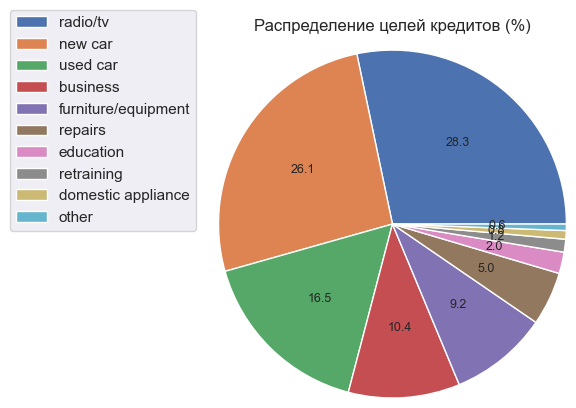

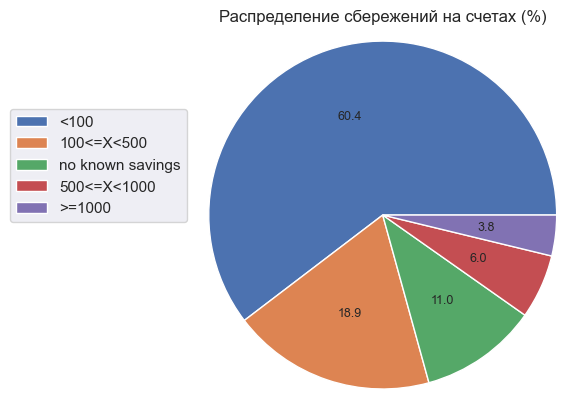

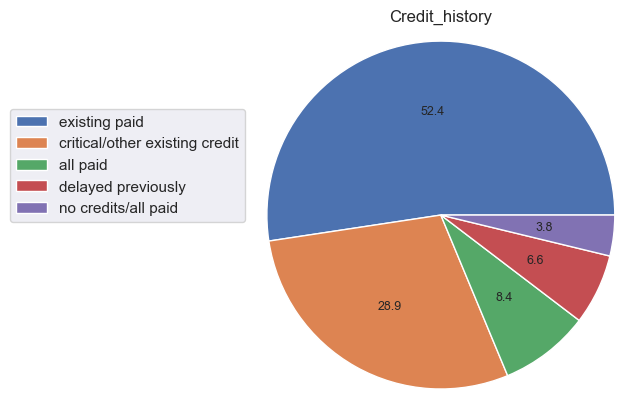

In [17]:
data_names_arr = [credit_df['purpose'].unique(), 
                  credit_df['savings_status'].unique(), 
                  credit_df['credit_history'].unique()]

data_values_arr = [credit_df.groupby(by='purpose').count()['age'].unique(), 
                   credit_df.groupby(by='savings_status').count()['age'].unique(),
                   credit_df.groupby(by='credit_history').count()['age'].unique()]

titles = ['Распределение целей кредитов (%)', 'Распределение сбережений на счетах (%)', 'Credit_history']

fig_rows = 1
fig_cols = 2
dpi = 100
for i in range(len(data_names_arr)):
        data_names = data_names_arr[i]
        data_values = data_values_arr[i]
        data_values[::-1].sort()
        
        fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
        mpl.rcParams.update({'font.size': 9})
              
        plt.title(titles[i], pad = 35)
        
        plt.pie(
            data_values, autopct='%.1f', radius = 1.5,
            explode = [0.0] + [0 for _ in range(len(data_names) - 1)] )
        plt.legend(
            bbox_to_anchor = (-0.40, 0.45, 0.25, 0.25),
            loc = 'lower right', labels = data_names )

Визуализируем количественные признаки

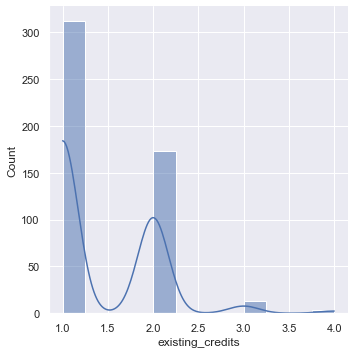

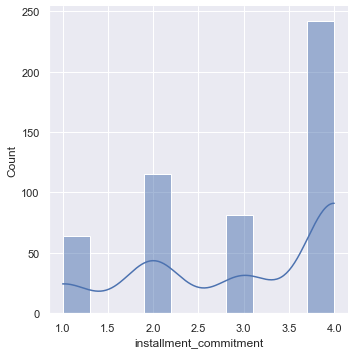

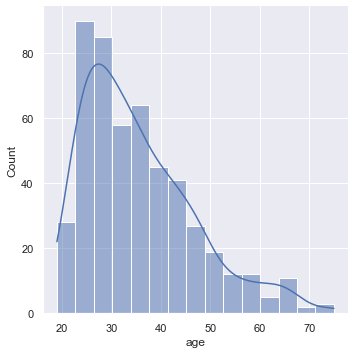

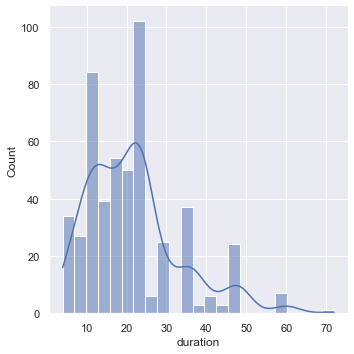

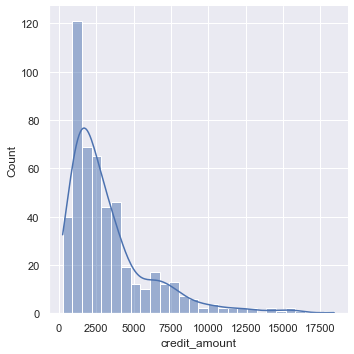

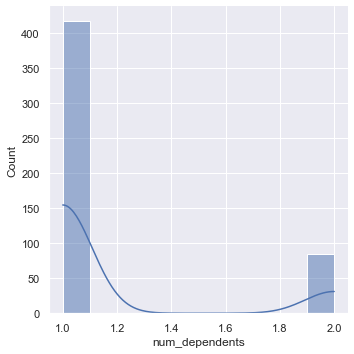

In [18]:
quantitative_cols = list(set(credit_df.columns) - set(categorical_cols))
for col in quantitative_cols:
    sns.displot(data=credit_df[col], kde=True)

Построим pairplot без деления по классам и с делением.

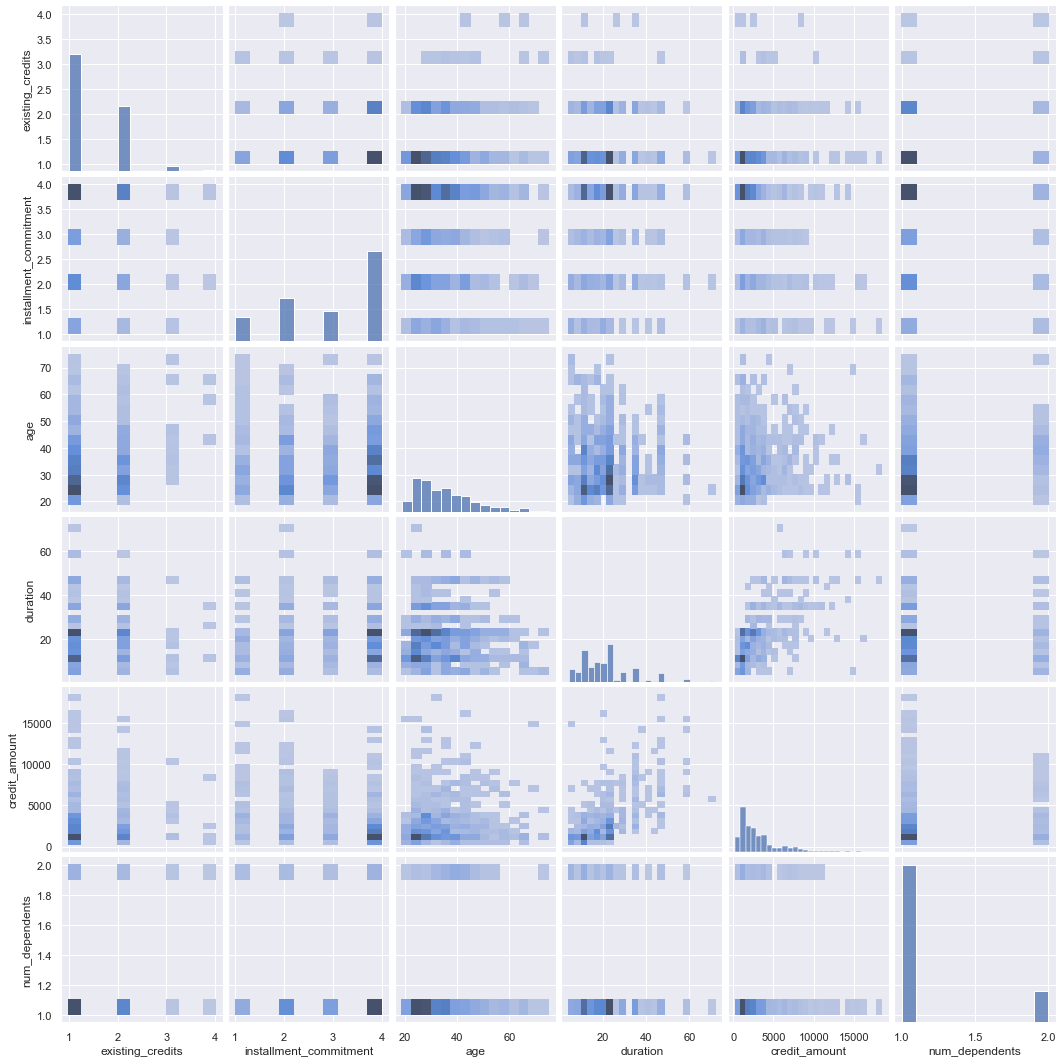

In [19]:
sns.pairplot(credit_df[quantitative_cols], kind="hist")

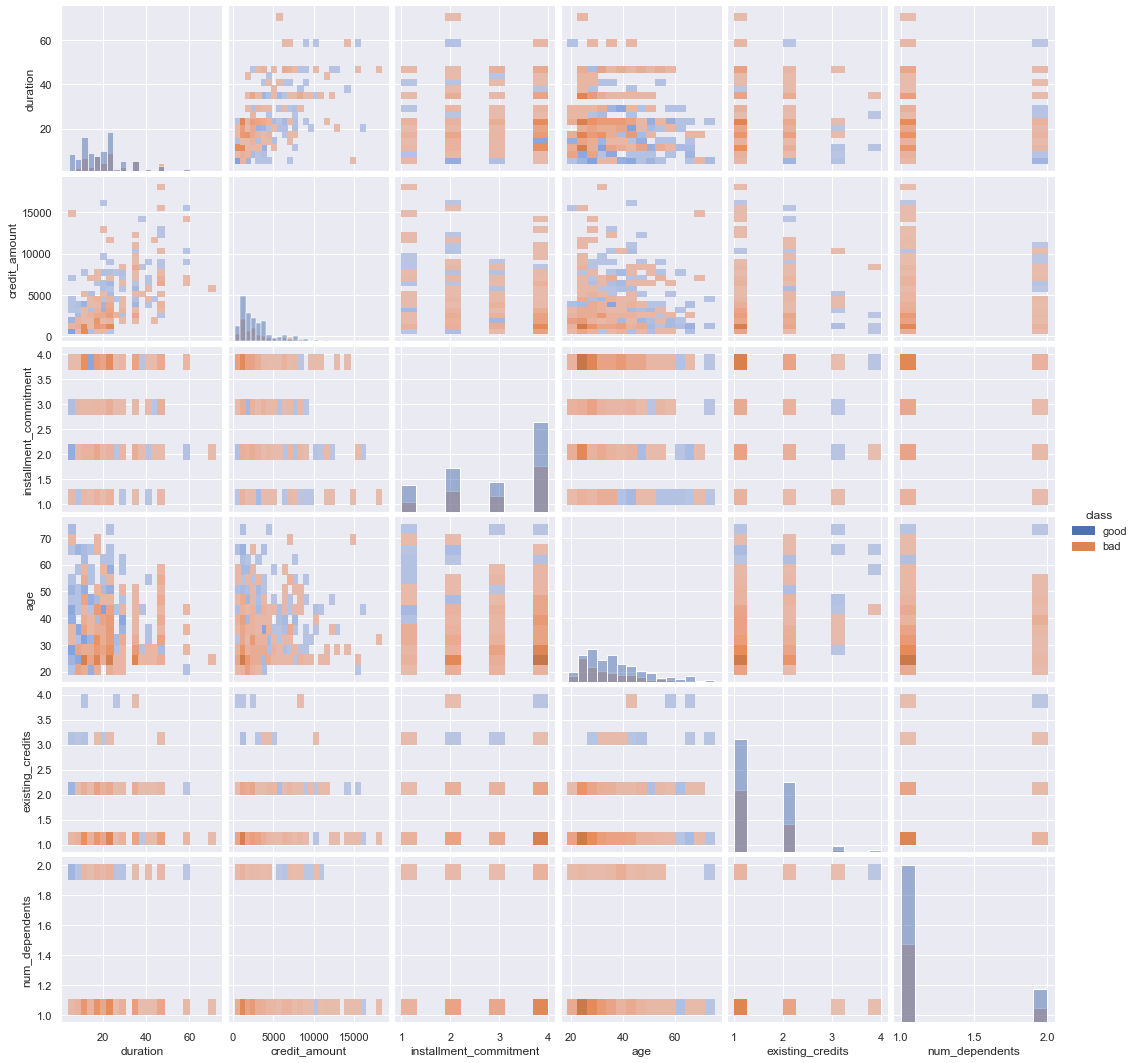

In [20]:
sns.pairplot(credit_df, kind="hist", hue="class")

Построим тепловую карту

<AxesSubplot:>

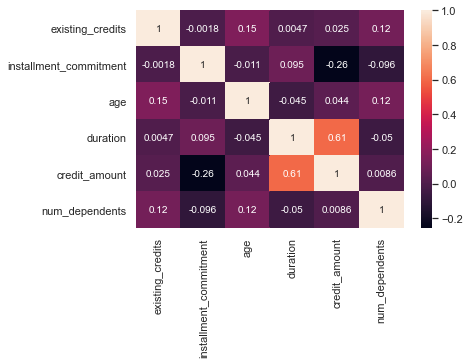

In [21]:
sns.heatmap(credit_df[quantitative_cols].corr(), annot=True, annot_kws={"size": 10})